In [9]:
#Loading essential 
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download historical data for Amazon (on NSE)
AMZN = yf.download("AMZN", start="2004-01-01", end="2024-12-31")
AMZN

# Save the data to a CSV file
AMZN.to_csv('AMZN.csv')
print("CSV file has been saved!")

import warnings
warnings.filterwarnings('ignore')

[*********************100%***********************]  1 of 1 completed

CSV file has been saved!


In [10]:
# Display the first few rows
AMZN.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2004-01-02,2.5950,2.5950,2.6565,2.5715,2.6380,132798000
2004-01-05,2.6635,2.6635,2.6800,2.5685,2.6000,225682000
2004-01-06,2.6515,2.6515,2.6750,2.6370,2.6555,119710000
2004-01-07,2.5950,2.5950,2.6330,2.5470,2.6090,184854000
2004-01-08,2.5120,2.5120,2.6050,2.5015,2.6045,206406000


In [14]:
# Basic summary statistics
print(AMZN.describe())

Price     Adj Close        Close         High          Low         Open  \
Ticker         AMZN         AMZN         AMZN         AMZN         AMZN   
count   5281.000000  5281.000000  5281.000000  5281.000000  5281.000000   
mean      51.708215    51.708215    52.311705    51.072344    51.716602   
std       60.075959    60.075959    60.776633    59.354798    60.095636   
min        1.303500     1.303500     1.315000     1.288000     1.304500   
25%        4.213000     4.213000     4.267500     4.139000     4.208500   
50%       16.627001    16.627001    16.790501    16.423000    16.688999   
75%       92.430000    92.430000    93.566002    91.440002    92.559998   
max      232.929993   232.929993   233.000000   228.009995   232.389999   

Price         Volume  
Ticker          AMZN  
count   5.281000e+03  
mean    1.081299e+08  
std     9.123553e+07  
min     1.500750e+07  
25%     5.844600e+07  
50%     8.657200e+07  
75%     1.310060e+08  
max     2.086584e+09  


In [15]:
print(AMZN.info)

<bound method DataFrame.info of Price        Adj Close       Close        High         Low        Open  \
Ticker            AMZN        AMZN        AMZN        AMZN        AMZN   
Date                                                                     
2004-01-02    2.595000    2.595000    2.656500    2.571500    2.638000   
2004-01-05    2.663500    2.663500    2.680000    2.568500    2.600000   
2004-01-06    2.651500    2.651500    2.675000    2.637000    2.655500   
2004-01-07    2.595000    2.595000    2.633000    2.547000    2.609000   
2004-01-08    2.512000    2.512000    2.605000    2.501500    2.604500   
...                ...         ...         ...         ...         ...   
2024-12-18  220.520004  220.520004  231.399994  220.110001  230.770004   
2024-12-19  223.289993  223.289993  226.089996  222.919998  224.910004   
2024-12-20  224.919998  224.919998  226.210007  218.729996  219.839996   
2024-12-23  225.059998  225.059998  226.880005  223.899994  225.009995   
2024-1

In [16]:
# Check for missing values
print(AMZN.isnull().sum())

Price      Ticker
Adj Close  AMZN      0
Close      AMZN      0
High       AMZN      0
Low        AMZN      0
Open       AMZN      0
Volume     AMZN      0
dtype: int64


In [18]:
# Add useful date-related columns
AMZN['Year'] = AMZN.index.year
AMZN['Month'] = AMZN.index.month
AMZN['Day'] = AMZN.index.day
AMZN['DayOfWeek'] = AMZN.index.dayofweek

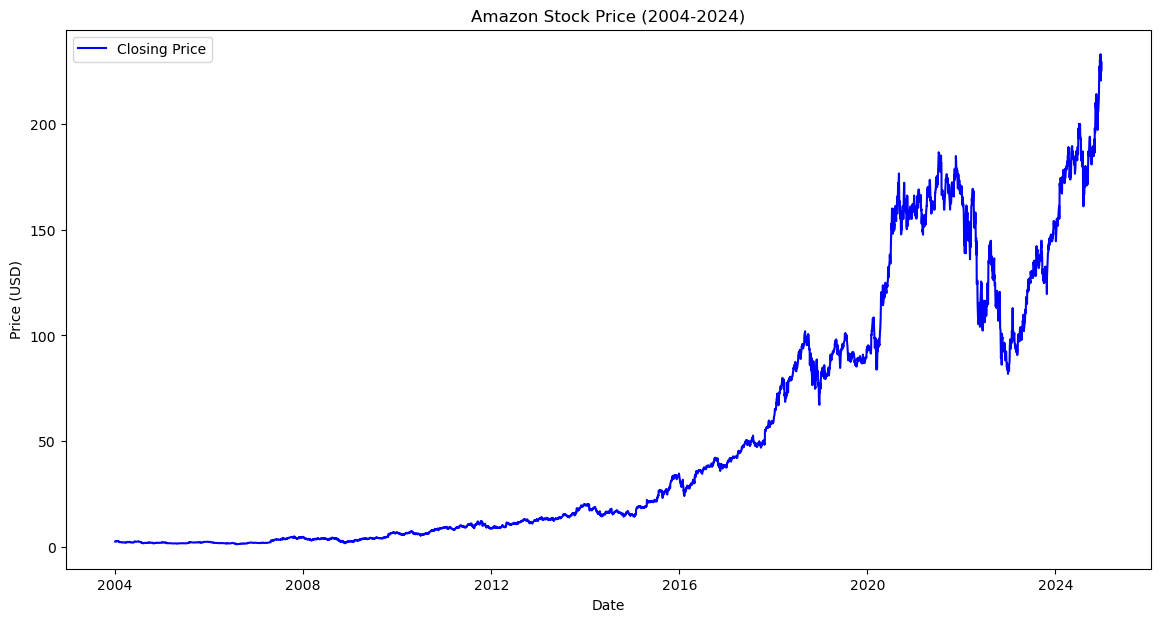

In [21]:
# Visualization: Closing Price Trend
plt.figure(figsize=(14, 7))
plt.title("Amazon Stock Price (2004-2024)")
plt.plot(AMZN['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

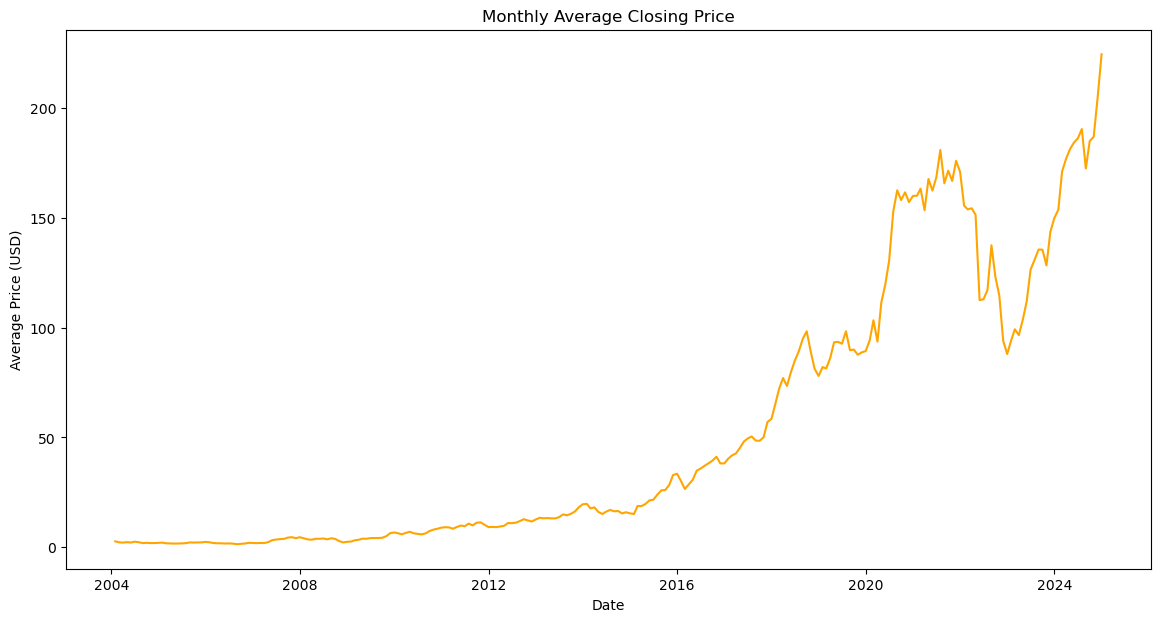

In [23]:
# Monthly Average Closing Price
monthly_avg = AMZN['Close'].resample('M').mean()
plt.figure(figsize=(14, 7))
plt.title("Monthly Average Closing Price")
plt.plot(monthly_avg, color='orange')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.show()

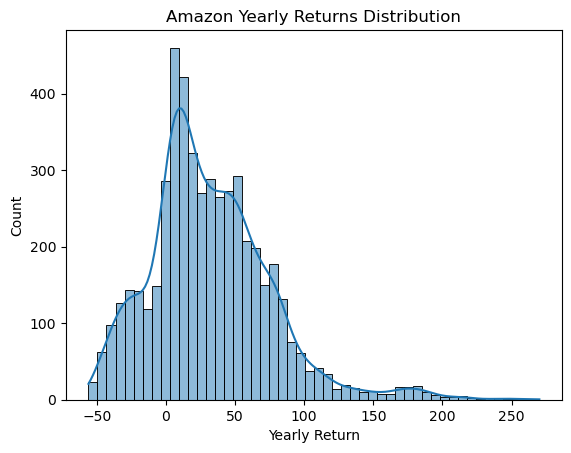

In [24]:
# Yearly returns analysis
AMZN['Yearly Return'] = AMZN['Close'].pct_change(periods=252) * 100
sns.histplot(AMZN['Yearly Return'].dropna(), bins=50, kde=True)
plt.title("Amazon Yearly Returns Distribution")
plt.show()

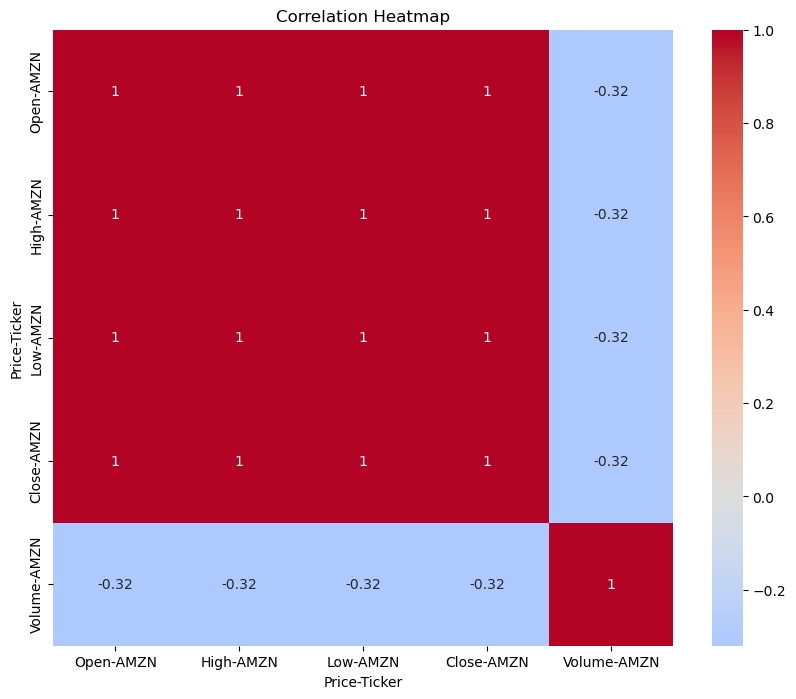

In [25]:
# Correlation Heatmap
corr_matrix = AMZN[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [26]:
# Moving Average (50-day and 200-day)
AMZN['50_MA'] = AMZN['Close'].rolling(window=50).mean()
AMZN['200_MA'] = AMZN['Close'].rolling(window=200).mean()

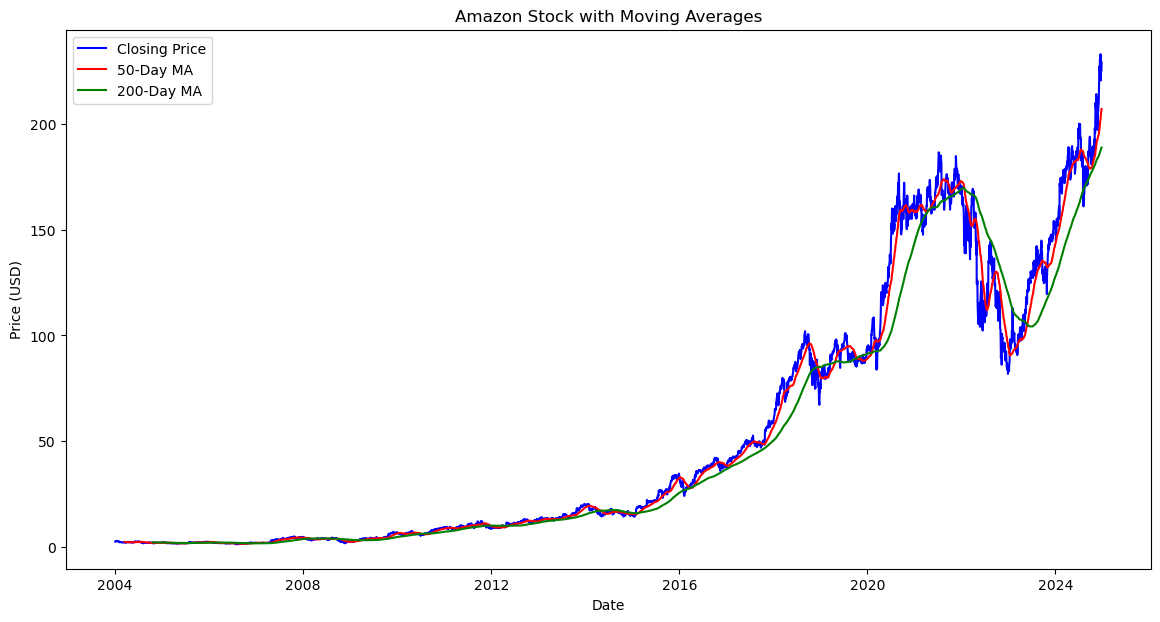

In [27]:
plt.figure(figsize=(14, 7))
plt.title("Amazon Stock with Moving Averages")
plt.plot(AMZN['Close'], label='Closing Price', color='blue')
plt.plot(AMZN['50_MA'], label='50-Day MA', color='red')
plt.plot(AMZN['200_MA'], label='200-Day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

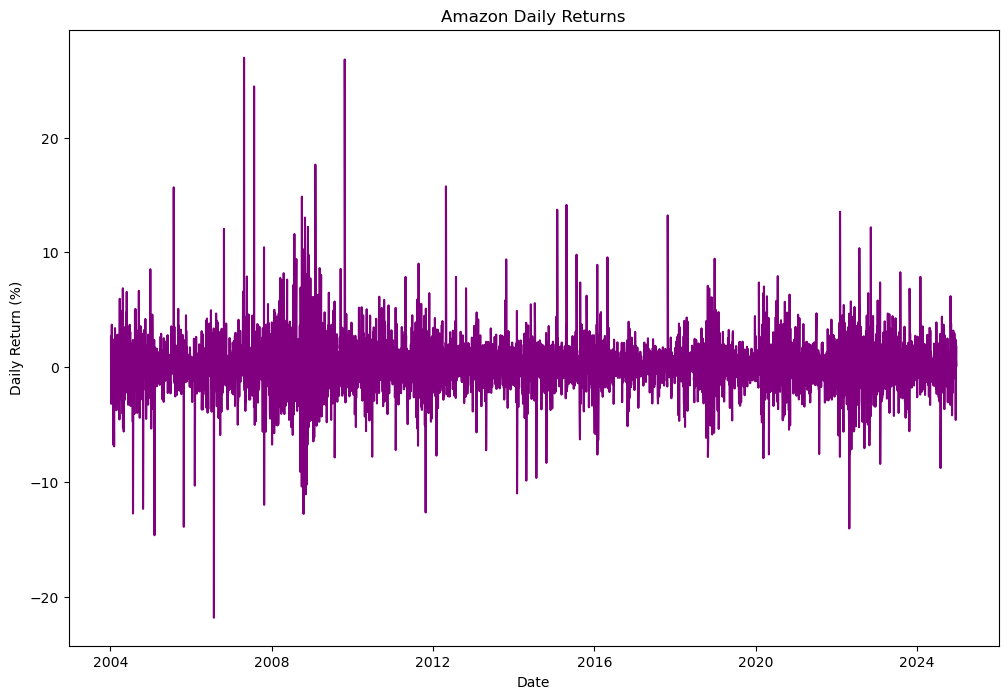

In [28]:
# Daily Returns Visualization
AMZN['Daily Return'] = AMZN['Close'].pct_change() * 100
plt.figure(figsize=(12, 8))
plt.title("Amazon Daily Returns")
plt.plot(AMZN['Daily Return'], color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

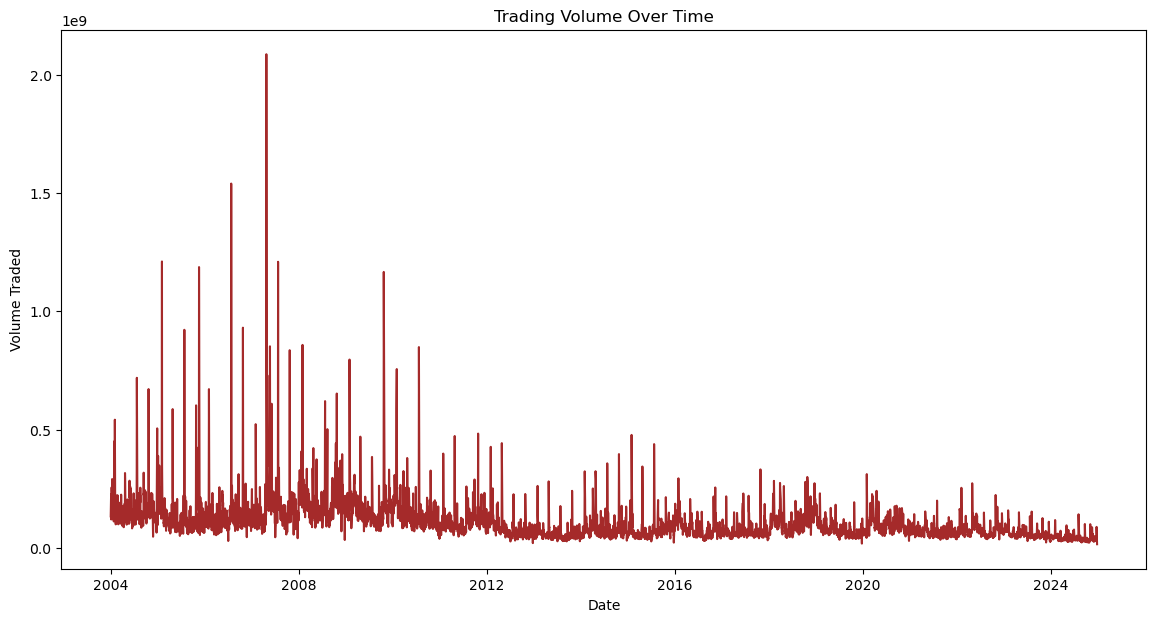

In [30]:
# Volume Traded Over Time
plt.figure(figsize=(14, 7))
plt.title("Trading Volume Over Time")
plt.plot(AMZN['Volume'], color='brown')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.show()

# Model Building

In [32]:
from datetime import datetime

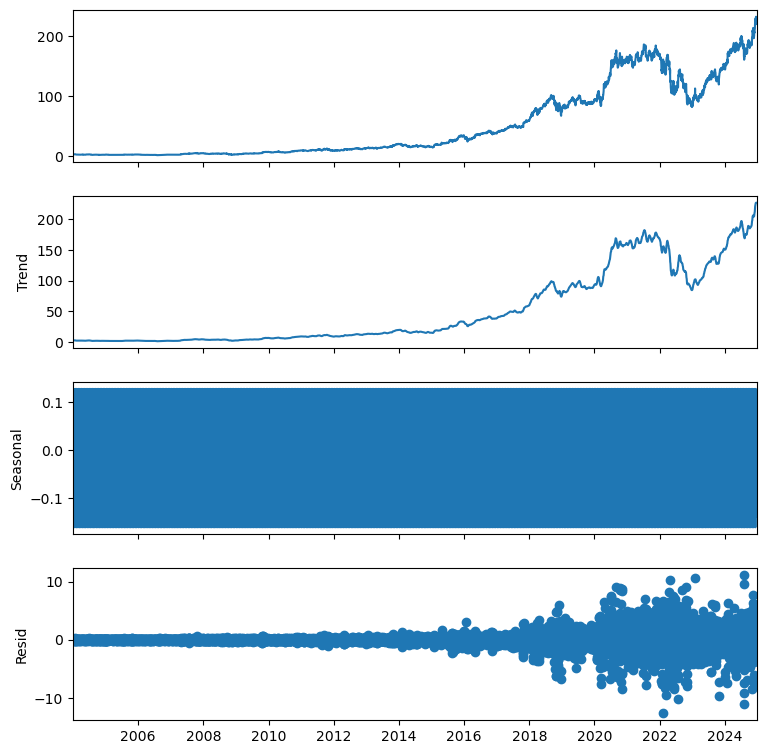

In [33]:
# Decompose the time series into trend, seasonal, and residual components 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(AMZN['Close'], model='additive', period=12) 
# Plot the original data, trend, seasonal, and residual components
fig = decomposition.plot() 
fig.set_size_inches(8, 8) 
plt.show()

In [35]:
# Loading essential libraries
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

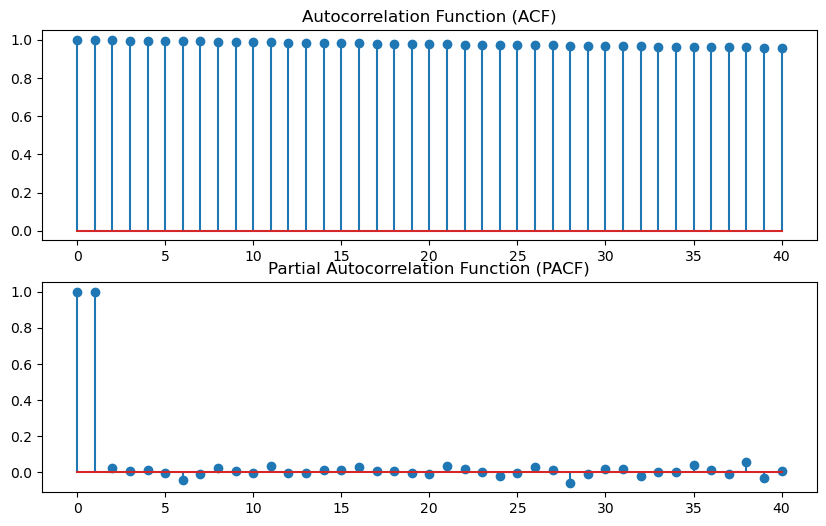

In [36]:
# ACF and PACF Plots
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.title('Autocorrelation Function (ACF)')
plt.stem(acf(AMZN['Close'], nlags=40))
plt.subplot(212)
plt.title('Partial Autocorrelation Function (PACF)')
plt.stem(pacf(AMZN['Close'], nlags=40))
plt.show()

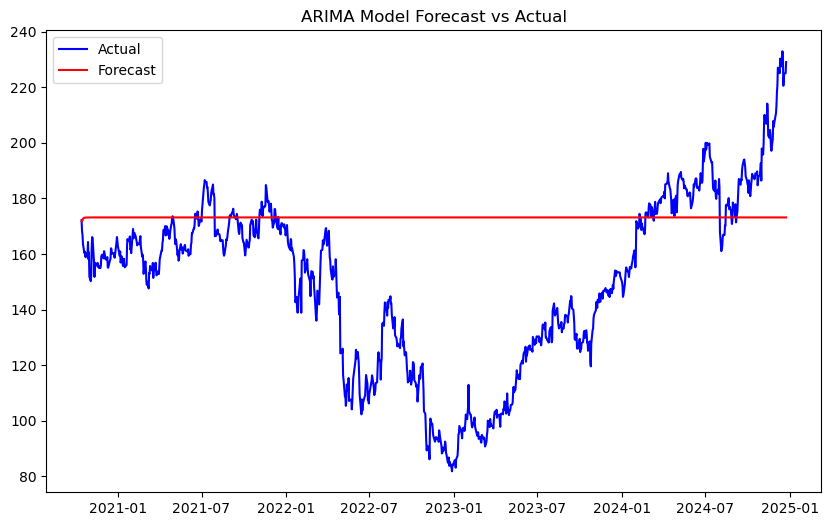

ARIMA RMSE: 38.83398157911428
ARIMA MAE: 29.639365527651012


In [37]:
#  ARIMA Model
# ARIMA (AutoRegressive Integrated Moving Average) is used for time series forecasting.

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Splitting data into training and testing sets
train_size = int(len(AMZN) * 0.8)
train, test = AMZN['Close'][:train_size], AMZN['Close'][train_size:]

# ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust order based on ACF/PACF plots
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluating model using RMSE and MAE
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

# Plotting the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, color='blue', label='Actual')
plt.plot(test.index, forecast, color='red', label='Forecast')
plt.title('ARIMA Model Forecast vs Actual')
plt.legend()
plt.show()

print(f'ARIMA RMSE: {rmse}')
print(f'ARIMA MAE: {mae}')


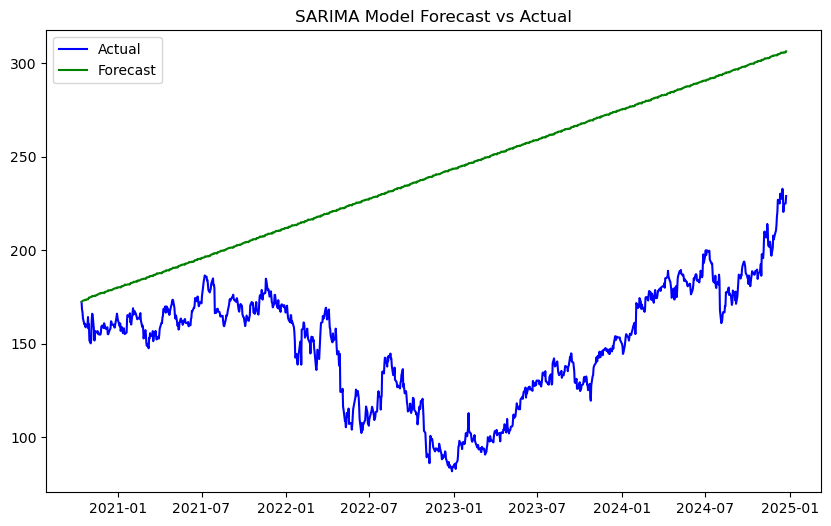

SARIMA RMSE: 100.79841375116318
SARIMA MAE: 89.6097329888531


In [39]:
#SARIMA Model (Seasonal ARIMA)
#SARIMA incorporates seasonal components.

from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example seasonal order
sarima_fit = sarima_model.fit()

# Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Evaluating model using RMSE and MAE
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
sarima_mae = mean_absolute_error(test, sarima_forecast)

plt.figure(figsize=(10, 6))
plt.plot(test.index, test, color='blue', label='Actual')
plt.plot(test.index, sarima_forecast, color='green', label='Forecast')
plt.title('SARIMA Model Forecast vs Actual')
plt.legend()
plt.show()

print(f'SARIMA RMSE: {sarima_rmse}')
print(f'SARIMA MAE: {sarima_mae}')


In [40]:
#Exponential Smoothing
# Exponential Smoothing is another technique for time series forecasting.
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_fit = exp_smoothing_model.fit()

# Forecast
exp_smoothing_forecast = exp_smoothing_fit.forecast(len(test))

# Evaluating model using RMSE and MAE
exp_smoothing_rmse = np.sqrt(mean_squared_error(test, exp_smoothing_forecast))
exp_smoothing_mae = mean_absolute_error(test, exp_smoothing_forecast)

print(f'Exponential Smoothing RMSE: {exp_smoothing_rmse}')
print(f'Exponential Smoothing MAE: {exp_smoothing_mae}')


Exponential Smoothing RMSE: 145.05877462858763
Exponential Smoothing MAE: 129.3211266644441


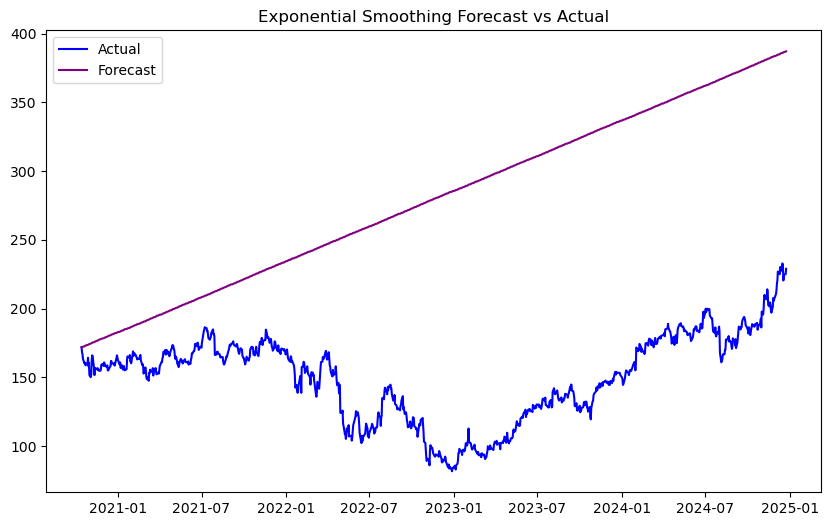

In [41]:
# Plotting the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, color='blue', label='Actual')
plt.plot(test.index, exp_smoothing_forecast, color='purple', label='Forecast')
plt.title('Exponential Smoothing Forecast vs Actual')
plt.legend()
plt.show()

In [44]:
#LSTM 
# For deep learning, we'll use LSTM (Long Short-Term Memory) to forecast stock prices.

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("AMZN_.csv")  
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [45]:
# Prepare data for LSTM
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define training data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [46]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=10)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Combine predictions and actual values
all_predictions = np.concatenate([train_predictions, test_predictions])
all_actual = np.concatenate([y_train, y_test])

# Inverse transform combined predictions and actual values
all_predictions = scaler.inverse_transform(all_predictions)
all_actual = scaler.inverse_transform(all_actual.reshape(-1, 1))


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0062
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.4452e-05
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.1060e-05
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.7625e-05
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.3128e-04
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.1679e-05
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.4794e-05
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.4017e-05
Epoch 9/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.2140e-05
Epoch 10/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.2952e-05
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


RMSE: 2.9247169448606205
RAE: 0.03449884521165389


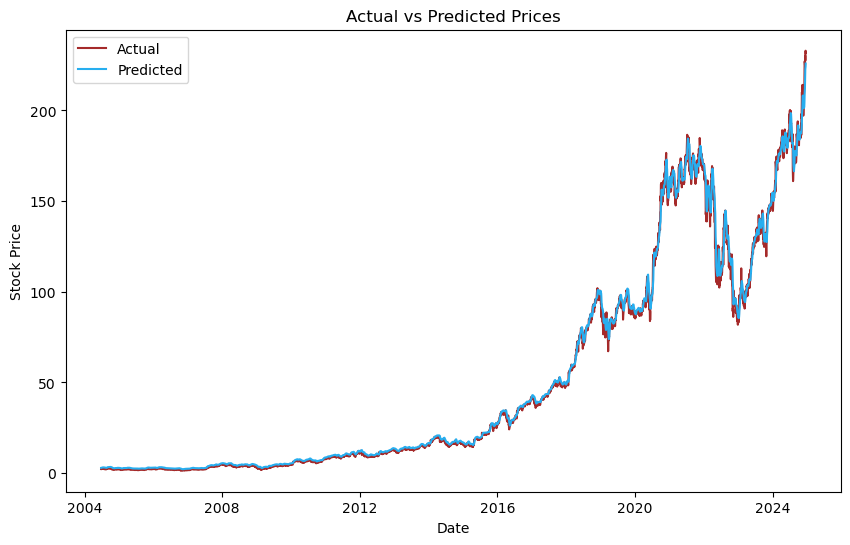

In [73]:
# RMSE Calculation
rmse = np.sqrt(mean_squared_error(all_actual, all_predictions))

# RAE Calculation
rae = np.sum(np.abs(all_actual - all_predictions)) / np.sum(np.abs(all_actual - np.mean(all_actual)))

print(f"RMSE: {rmse}")
print(f"RAE: {rae}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(all_actual):], all_actual, label='Actual', color='brown')
plt.plot(df.index[-len(all_actual):], all_predictions, label='Predicted', color='#27aeef')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [79]:
import pickle

# Save the model
model.save("lstm_model.h5")

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler,f)